<a href="https://colab.research.google.com/github/riyapatelrp/Automatic-Speech-Recognization-ASR-/blob/main/ASR_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Mounting Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
from zipfile import ZipFile
file_name = '/content/gdrive/MyDrive/Colab Notebooks/CNN/archive (2).zip'

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print("Done")

Done


In [ ]:
import os
os.listdir(os.getcwd())

['.config',
 'train_test_split.csv',
 'cats_dogs',
 'utils.py',
 'gdrive',
 'sample_data']

In [ ]:
# Import ML Libraries
from os import listdir
from os.path import isfile, join
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import numpy as np
import pylab as pl

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

from scipy.io import wavfile
import IPython.display as ipd

In [ ]:
import os
sounds = os.listdir("/content/cats_dogs/")
print(os.listdir("/content/"))

['.config', 'train_test_split.csv', 'cats_dogs', 'utils.py', 'gdrive', 'sample_data']


In [ ]:
# Import DL Library - Tensorflow and Keras
import glob
import ntpath
import tensorflow as tf

from keras import layers
from keras import models
from keras import optimizers

# List the wav files
ROOT_DIR_TEST = glob.glob('/content/cats_dogs/test')[0]
ROOT_DIR_TRAIN = glob.glob('/content/cats_dogs/train')[0]
# Random Shuffling
tf.random.shuffle(ROOT_DIR_TRAIN)
tf.random.shuffle(ROOT_DIR_TEST)

# test = dogs in this case ! (wrong name of directory was given when it was created)
# The glob module, which is short for global, is a function that's used to search for files that match a specific file pattern or name.
X_path = glob.glob(ROOT_DIR_TEST + "/test/*")
X_path = X_path + glob.glob(ROOT_DIR_TEST + "/cats/*")
X_path = X_path + glob.glob(ROOT_DIR_TRAIN + "/dog/*")
X_path = X_path + glob.glob(ROOT_DIR_TRAIN + "/cat/*")
print (len(X_path))

277


In [ ]:
y = np.empty((0, 1, ))
for f in X_path:
  if 'cat' in ntpath.basename(f):
    resp = np.array([0])
    resp = resp.reshape(1, 1, )
    y = np.vstack((y, resp))
  elif 'dog' in ntpath.basename(f):
    resp = np.array([1])
    resp = resp.reshape(1, 1, )
    y = np.vstack((y, resp))
print (f)

/content/cats_dogs/train/cat/cat_63.wav


In [ ]:
# Split train and test
X_train, X_test, y_train, y_test = train_test_split(X_path, y, test_size=0.33, random_state=41)

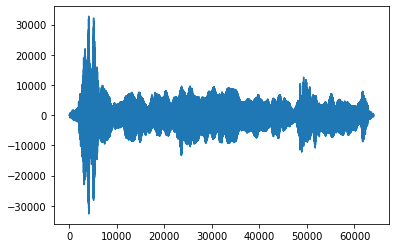

dog_barking_48.wav
(16000, array([  -1,    0,   -1, ..., -330, -216, -142], dtype=int16))


In [ ]:
# Reading the waves of random sound
w = wavfile.read('/content/cats_dogs/'+sounds[0])
plt.plot(w[1])
plt.show()
print(sounds[0])
ipd.Audio('/content/cats_dogs/'+sounds[0])

print(w)

In [ ]:
def read_wav_files(wav_files):
  if not isinstance(wav_files, list):
    wav_files = [wav_files]
  return [sci_wav.read(f)[1] for f in wav_files]

In [ ]:
def librosa_read_wav_files(wav_files):
  if not isinstance(wav_files, list):
    wav_files = [wav_files]
  return [librosa.load(f)[0] for f in wav_files]

In [ ]:
# librosa is a python package for music and audio analysis
import librosa
wav_rate = librosa.load(X_train[0])[1]
X_train = librosa_read_wav_files(X_train)
X_test  = librosa_read_wav_files(X_test)

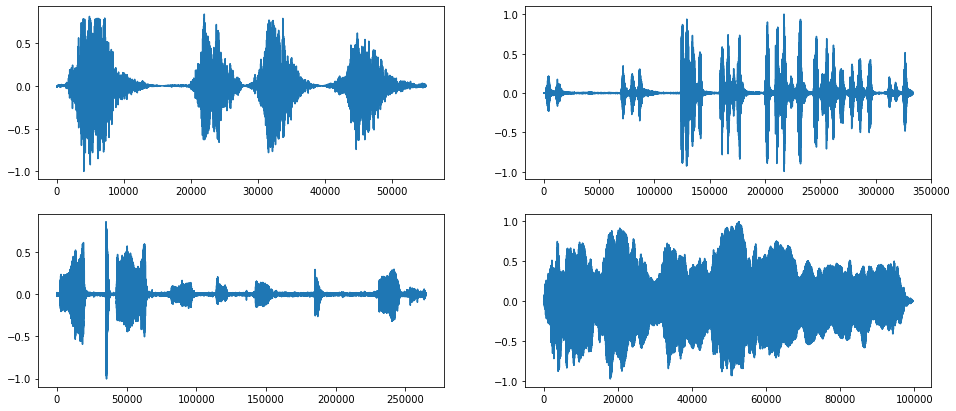

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2, figsize=(16,7))
axs[0][0].plot(X_train[0])
axs[0][1].plot(X_train[1])
axs[1][0].plot(X_train[2])
axs[1][1].plot(X_train[3])
plt.show()

In [ ]:
# Reding the audio of random array. You can change the value of array (X_train[any_number_from_dataset]) to hear the different audio
ipd.Audio('/content/cats_dogs/dog_barking_27.wav')
ipd.Audio(X_train[7],  rate=wav_rate)

In [ ]:
# function to extract all the features needed for the classification
def extract_features(audio_samples, sample_rate):
  extracted_features = np.empty((0, 41, ))
  if not isinstance(audio_samples, list):
    audio_samples = [audio_samples]

  for sample in audio_samples:
    # calculate the zero-crossing feature
    zero_cross_feat = librosa.feature.zero_crossing_rate(sample).mean()

    # calculate the mfccs features
    mfccs = librosa.feature.mfcc(y=sample, sr=sample_rate, n_mfcc=40)
    mfccsscaled = np.mean(mfccs.T,axis=0)

    # add zero crossing feature to the feature list
    mfccsscaled = np.append(mfccsscaled, zero_cross_feat)
    mfccsscaled = mfccsscaled.reshape(1, 41, )

    extracted_features = np.vstack((extracted_features, mfccsscaled))

  # return the extracted features
  return extracted_features


1
(1, 41)


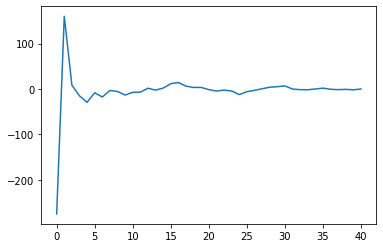

In [ ]:
features = ((extract_features(X_train[0], wav_rate)))

print (len(features))
print (features.shape)
plt.plot(features[0])
plt.show()

In [ ]:
X_train_features = extract_features(X_train, wav_rate)
X_test_features  = extract_features(X_test, wav_rate)

In [ ]:
# Convert the labels to match what our model will expect
from keras.utils import np_utils
train_labels = np_utils.to_categorical(y_train)
test_labels = np_utils.to_categorical(y_test)

In [ ]:
# Creating the NN layer
model = models.Sequential()

model.add(layers.Dense(100, activation = 'relu', input_shape = (41, )))
model.add(layers.Dense(50, activation = 'relu'))
model.add(layers.Dense(2, activation = 'softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               4200      
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dense_2 (Dense)             (None, 2)                 102       
                                                                 
Total params: 9,352
Trainable params: 9,352
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
Model = model.fit(X_train_features, train_labels, validation_data=(X_test_features,test_labels), epochs = 200, verbose = 1)

Epoch 1/200
6/6 [==============================] - 3s 36ms/step - loss: 1.9822 - accuracy: 0.6757 - val_loss: 1.1540 - val_accuracy: 0.8587
Epoch 2/200
6/6 [==============================] - 0s 7ms/step - loss: 1.0648 - accuracy: 0.8108 - val_loss: 1.0045 - val_accuracy: 0.8152
Epoch 3/200
6/6 [==============================] - 0s 7ms/step - loss: 0.5054 - accuracy: 0.8973 - val_loss: 1.1801 - val_accuracy: 0.7283
Epoch 4/200
6/6 [==============================] - 0s 8ms/step - loss: 0.3472 - accuracy: 0.9027 - val_loss: 0.6889 - val_accuracy: 0.8587
Epoch 5/200
6/6 [==============================] - 0s 7ms/step - loss: 0.2742 - accuracy: 0.9081 - val_loss: 1.0593 - val_accuracy: 0.6957
Epoch 6/200
6/6 [==============================] - 0s 7ms/step - loss: 0.3055 - accuracy: 0.8811 - val_loss: 0.5682 - val_accuracy: 0.8587
Epoch 7/200
6/6 [==============================] - 0s 11ms/step - loss: 0.2135 - accuracy: 0.9243 - val_loss: 0.6705 - val_accuracy: 0.8478
Epoch 8/200
6/6 [========

In [ ]:
# Save the model
model.save_weights('model_wieghts.h5')
model.save('DogCatModel_keras.h5')

In [ ]:
# list all data in history
print(Model.history.keys())

acc = Model.history['accuracy']
val_acc = Model.history['val_accuracy']
epochs = range(1, len(acc)+1)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


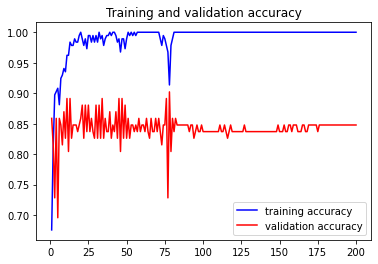

In [ ]:
plt.plot(epochs, acc, 'b', label = "training accuracy")
plt.plot(epochs, val_acc, 'r', label = "validation accuracy")
plt.title('Training and validation accuracy')
plt.legend()

plt.show()

Predictions

In [ ]:
nr_to_predict = 8   #change the number and see predicted voice
pred = model.predict(X_test_features[nr_to_predict].reshape(1, 41,))

print("Cat: {} Dog: {}".format(pred[0][0], pred[0][1]))

Cat: 0.8760156035423279 Dog: 0.1239844411611557


The label says that it is a CAT!!!


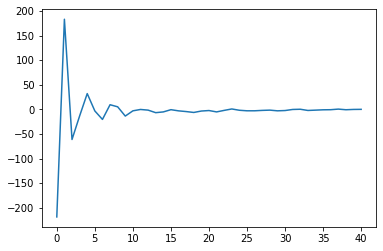

In [ ]:
if (y_test[nr_to_predict] == 0):
    print ("The label says that it is a CAT!!!")
else:
    print ("The label says that it is a DOG!")

plt.plot(X_test_features[nr_to_predict])
ipd.Audio(X_test[nr_to_predict],  rate=wav_rate)